## Applied Machine Learning

### Project

In this class, we have worked to understand both the general principles of machine learning methods and the lower-level details required to get specific machine learning techniques to work in practice. For this project, you will apply what you have learned in this course to formulate and answer your own question using ML methods.

**Important:** Be sure to include code and answers in the correct cells of the notebook. Otherwise you might not get full credit for your work.

Please use this notebook to turn in your work. 

Points: 70

You will be graded based on:
1. __Technical completeness__. _(50 points)_ 

Did you meet the technical requirements for the project? For instance, did you describe hyperparameter tuning and include plots, where necessary.

2. __Creativity, imagination and ambition__. _(10 points)_ 

Did you form an interesting, creative and ambitious question, and explain why it is important to answer that question?

_Note: downloading a ready-made dataset you find online (e.g. on Kaggle) and answering a question that is already defined for you will make it hard to get full points for creativity, imagination and ambition. (Unless you do something else interesting and ambitious, e.g. analyze attributes of a specific model very closely.) To get full points for creativity/imagination/ambition you will need to think a little a bit more. The bar will be higher for 5604 students._

3. __Presentation__. _(10 points)_ 

Did you do a good job presenting your results? Would your notebook make sense to a person who was not familiar with your project? You should take time to write clearly, simplify your code and explain what you are doing in your notebook. At minimum:

- Make sure your plots are well-labeled and appropriately scaled, delete code that does not work correctly, and be sure to mix code and text so that readers can easily understand your work. 
- Check out [this](https://jakevdp.github.io/blog/2015/07/23/learning-seattles-work-habits-from-bicycle-counts/) blog post for a nice example of how to present a data analysis clearly.
- Put yourself in the reader's shoes. What would be confusing? Annoying? Helpful? Pretend you don't know anything about your project. What information needs to be presented first? What information needs to be presented last?

## Question 

_Using this cell, please write a short, clear paragraph explaining what question you plan to answer in this notebook. Your question can be narrow (e.g. can we predict a dog's height from its weight) or broad (e.g. what features are important or unimportant in predicting the price of a house). Briefly describe why your question is important and how you plan to answer. Be sure to explain what is imaginative, creative or ambitious about your planned work! For instance, will you spend a lot of time defining new features, will you be working with hard-to-get data, will your work inform a major theoretical debate? Be sure to ask a question you can actually start to answer using machine learning techniques!_


<b>I am going to be looking at the differnece and prediction of tweets from President Trump. To acomplish this I am loading in a training and testing .tsv file that classifies trumps tweets by category of 'sent from' Android and Iphone. The second column of the .tsv is the actual tweet that trump send, this is str form. During this notebook I want to explore two ideals. One, analyze the category labels of Android and Iphone through SDG calissification to create a prediction function on the data. This will give us both the threshold and precision of of test set. Moreover, I want to run sentiment analysis on the second column, President Trump's tweets. For this I will use VaderSentiment which is a score library that categorizes str sentiments from percentages pos, neg, nuetral, and then a compound score which is combined score range between -1 to 1. This range indicates -1 being negative and 1 being a posotive sentiment. This will achieve insight towards the vernacular that the President used in his tweets and his chief of staff.</b>

## Data

_Using this cell, please write a short, clear paragraph explaining what data you will use to answer your question. You do not need to go gather custom datasets for this class, although you are welcome to do so. Just downloading data from Kaggle is fine, although you are highly encouraged to think a little harder and more creatively when you do the project. There are many, many places to find interesting datasets online related to many topics like music, politics, sports, transportation, etc. Data gathering is one way to make your project more creative, but you are not necessarily expected to take on a major data gathering effort. Be sure to describe how you plan to split between the training and test sets, if this is not defined for you. You might want to check out Google's [dataset search](https://datasetsearch.research.google.com/), [data is plural](https://docs.google.com/spreadsheets/d/1wZhPLMCHKJvwOkP4juclhjFgqIY8fQFMemwKL2c64vk/edit#gid=0) or Prof. Keegan's [list of datasets](https://medium.com/information-expositions/list-of-lists-of-datasets-c9bf52370755)_.

<b>My data is split into labels for both training and testing set. This makes the process relatively convienitt to start the analysis of precision and threshold and then follow that up with sentiment analysis of posotive and negative words. Majority of the code will go towards an effort to have the classifier predict who is tweeting a President Trump's tweets. </b>

#### Data preprocessing

In [172]:
## Code for data preprocessing 

# Include your code to load, clean and split data in this cell. You must complete this step in the project.
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

#training set
df_train = pd.read_csv('tweets.train.tsv', sep='\t', header=None)

Y_train = df_train.iloc[0:, 0].values
text_train = df_train.iloc[0:, 1].values

vec = CountVectorizer()
X_train = vec.fit_transform(text_train)
feature_names = np.asarray(vec.get_feature_names())

#testing set
df_test = pd.read_csv('tweets.test.tsv', sep='\t', header=None)
Y_test = df_test.iloc[0:, 0].values
text_test = df_test.iloc[0:, 1].values

X_test = vec.transform(text_test)

In [173]:
X_test.shape

(185, 4829)

In [174]:
Y_test.shape

(185,)

In [175]:
X_train.shape

(2593, 4829)

## Model selection and tuning

_Using this cell, please write a short, clear paragraph explaining how you selected and tuned your model for the project. You must answer the following questions in this cell (1) Why is your model an appropriate choice for your data? (2) What hyperparameters does your model have and how did you select them? (3) What features did you choose and why?_

You must, at minimum:
1. Engineer one feature
2. Tune one hyperparameter
3. Make a plot or table examining performance of your model under different parameter settings

<b>For both data sets I fit the data one a countvectorizer becuase it can return fitted data to a specific label. In the case of my X/y_trian and X/y_testing data sets I used countvectorization becase it was the best choice to fit str data correlated to a label. In the case of my sentiment analysis I chose countvec again to transform the int range to the label range of 0 or 1 for Android or Iphone. After the transformation of my data set I can begin to run tests on the data. lastly, the features I chose relate to my goal to identify trumps tweets from text analysis to the boolean of an Iphone or not and the sentiment score corresponding to the same label boolean. 
<br>
After fitting my data it is time to investigate the right perameters to use when modeling my machines learning. For the regular X/y_train and test I want to identify if the points are linearly seperable between labels. To acomplish this I am running an SGD classification to learn the data and recieve back the number of iterations, both dataset accuracies, as well as collect the feature weight by name into a new DF. This will help me better understand how the SGD classifier is weighting specific words in the training set. 
<br>
For analyzing my sentiment training and testing set I am using differnet classifiers to achieve strong accuracy rates. However, becuase the data does not seem to have a strong correlation to the label my accuracy scores on the training to testing set is low. Futhermore, I am going to investigate error on my sentiment data with precision,  recall, and confusion matrix tactics. </b>

In [176]:
sentiment_train = df_train
sentiment_test = df_test

sentiment_test[1]

0      The spotlight has finally been put on the low-...
1      'Remarks by President Trump at Signing of H.J....
2      #ICYMI: Joint Statement with Prime Minister Sh...
3      ...long he doesn't know how to win anymore, ju...
4      It is a disgrace that my full Cabinet is still...
                             ...                        
180    Just won a big federal lawsuit similar in cert...
181    '_USERNAME_ ._USERNAME_ thank God is not a pol...
182    Thank you, Arizona! #Trump2016 #WesternTuesday...
183    Big Republican Dinner tonight at Mar-a-Lago in...
184    Wow, _USERNAME_ ratings are up 75% because it'...
Name: 1, Length: 185, dtype: object

In [6]:

sentiment_train[1] = sentiment_train[1].apply(lambda x: x.split(' '))
sentiment_test[1] = sentiment_test[1].apply(lambda x: x.split(' '))

#sentiment_split_train = df_train[1].apply(lambda x: x.split(' '))
#df[['city','state']]=df['location'].str.split(',',expand=True).apply(lambda x: x.str.strip())
sentiment_train

,0,1
0,Android,"[My, statement, as, to, what's, happening, in,..."
1,Android,"[Will, be, having, many, meetings, this, weeke..."
2,Android,"[Don't, believe, the, main, stream, (fake, new..."
3,Android,"[Looking, forward, to, the, Florida, rally, to..."
4,Android,"['One, of, the, most, effective, press, confer..."
...,...,...
2588,iPhone,"[._USERNAME_, Just, watched, you, on, #Watters..."
2589,iPhone,"[THANK, YOU, ARIZONA!, 20,000, amazing, suppor..."
2590,iPhone,"[Great, to, be, back, in, Arizona!, #MakeAmeri..."
2591,Android,"[If, crazy, _USERNAME_, didn't, cover, me, so,..."


In [8]:
#using vaderSentiment to create sentiment score for tweets
#going to use the compound score to create float score between -1 and 1
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [177]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_analyzer = SentimentIntensityAnalyzer()

In [178]:
#create definitions for getting teh sentiment score 
#create individual sentiment score for each lambda str iteration
def get_sentiment(text:str, analyser,desired_type:str='pos'):
    # Get sentiment from text
    sentiment_score = analyser.polarity_scores(text)
    return sentiment_score[desired_type]

# Get Sentiment scores
#call get_sentiment withing the .apply lambda function 
#this function adds to the df with their pos neg and nuetral sentiment scores
def get_sentiment_scores(df_and_column,df):
    df['Positive Sentiment Score'] = df_and_column.astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'pos'))
    df['Negative Sentiment Score'] = df_and_column.astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'neg'))
    df['Neutral Sentiment Score'] = df_and_column.astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'neu'))
    df['Compound Sentiment Score'] = df_and_column.astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'compound'))
    return df

In [183]:
sentiment_train = get_sentiment_scores(sentiment_train[1],sentiment_train)
sentiment_test = get_sentiment_scores(sentiment_test[1],sentiment_test)

In [184]:
sentiment_train['Compound Sentiment Score'] = round(sentiment_train['Compound Sentiment Score']*100,0)

In [185]:
sentiment_test['Compound Sentiment Score'] = round(sentiment_test['Compound Sentiment Score']*100,0)


In [186]:
sentiment_test

,0,1,Positive Sentiment Score,Negative Sentiment Score,Neutral Sentiment Score,Compound Sentiment Score
0,Android,The spotlight has finally been put on the low-...,0.000,0.000,1.000,0.0
1,iPhone,'Remarks by President Trump at Signing of H.J....,0.000,0.000,1.000,0.0
2,iPhone,#ICYMI: Joint Statement with Prime Minister Sh...,0.000,0.000,1.000,0.0
3,Android,"...long he doesn't know how to win anymore, ju...",0.204,0.133,0.663,56.0
4,Android,It is a disgrace that my full Cabinet is still...,0.000,0.194,0.806,-70.0
...,...,...,...,...,...,...
180,Android,Just won a big federal lawsuit similar in cert...,0.141,0.049,0.810,41.0
181,Android,'_USERNAME_ ._USERNAME_ thank God is not a pol...,0.195,0.128,0.677,-5.0
182,iPhone,"Thank you, Arizona! #Trump2016 #WesternTuesday...",0.318,0.000,0.682,42.0
183,Android,Big Republican Dinner tonight at Mar-a-Lago in...,0.000,0.000,1.000,0.0


In [187]:
sentiment_train

,0,1,Positive Sentiment Score,Negative Sentiment Score,Neutral Sentiment Score,Compound Sentiment Score
0,Android,My statement as to what's happening in Sweden ...,0.000,0.000,1.000,0.0
1,Android,Will be having many meetings this weekend at T...,0.000,0.000,1.000,0.0
2,Android,Don't believe the main stream (fake news) medi...,0.116,0.191,0.693,-36.0
3,Android,Looking forward to the Florida rally tomorrow....,0.000,0.000,1.000,0.0
4,Android,'One of the most effective press conferences I...,0.115,0.275,0.610,-69.0
...,...,...,...,...,...,...
2588,iPhone,._USERNAME_ Just watched you on #WattersWorld ...,0.314,0.000,0.686,83.0
2589,iPhone,"THANK YOU ARIZONA! 20,000 amazing supporters! ...",0.536,0.000,0.464,94.0
2590,iPhone,Great to be back in Arizona! #MakeAmericaGreat...,0.354,0.000,0.646,66.0
2591,Android,If crazy _USERNAME_ didn't cover me so much on...,0.000,0.201,0.799,-70.0


In [16]:
#when fitting my score vectors they need to be inputted as an int
#to accomplish this am multiplying their decimal range or -1 to 1 to -100 to 100. Then rounding the score to 0 decimnal points and then converting the column into an int
sentiment_test['Compound Sentiment Score'] = sentiment_test['Compound Sentiment Score'].astype('int')
sentiment_test

,0,1,Positive Sentiment Score,Negative Sentiment Score,Neutral Sentiment Score,Compound Sentiment Score
0,Android,"[The, spotlight, has, finally, been, put, on, ...",0.000,0.000,1.000,0
1,iPhone,"['Remarks, by, President, Trump, at, Signing, ...",0.000,0.000,1.000,0
2,iPhone,"[#ICYMI:, Joint, Statement, with, Prime, Minis...",0.000,0.000,1.000,0
3,Android,"[...long, he, doesn't, know, how, to, win, any...",0.204,0.133,0.663,56
4,Android,"[It, is, a, disgrace, that, my, full, Cabinet,...",0.000,0.194,0.806,-70
...,...,...,...,...,...,...
180,Android,"[Just, won, a, big, federal, lawsuit, similar,...",0.141,0.049,0.810,41
181,Android,"['_USERNAME_, ._USERNAME_, thank, God, is, not...",0.195,0.128,0.677,-5
182,iPhone,"[Thank, you,, Arizona!, #Trump2016, #WesternTu...",0.318,0.000,0.682,42
183,Android,"[Big, Republican, Dinner, tonight, at, Mar-a-L...",0.000,0.000,1.000,0


In [17]:
sentiment_train['Compound Sentiment Score'] = sentiment_train['Compound Sentiment Score'].astype('int')
sentiment_train

,0,1,Positive Sentiment Score,Negative Sentiment Score,Neutral Sentiment Score,Compound Sentiment Score
0,Android,"[My, statement, as, to, what's, happening, in,...",0.000,0.000,1.000,0
1,Android,"[Will, be, having, many, meetings, this, weeke...",0.000,0.000,1.000,0
2,Android,"[Don't, believe, the, main, stream, (fake, new...",0.116,0.191,0.693,-36
3,Android,"[Looking, forward, to, the, Florida, rally, to...",0.000,0.000,1.000,0
4,Android,"['One, of, the, most, effective, press, confer...",0.115,0.275,0.610,-69
...,...,...,...,...,...,...
2588,iPhone,"[._USERNAME_, Just, watched, you, on, #Watters...",0.314,0.000,0.686,83
2589,iPhone,"[THANK, YOU, ARIZONA!, 20,000, amazing, suppor...",0.536,0.000,0.464,94
2590,iPhone,"[Great, to, be, back, in, Arizona!, #MakeAmeri...",0.354,0.000,0.646,66
2591,Android,"[If, crazy, _USERNAME_, didn't, cover, me, so,...",0.000,0.201,0.799,-70


In [20]:
#sentiment training and fit of vector data
from sklearn import preprocessing
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
#sentiment training set

X_train_sentiment = sentiment_train[0].values
#X_train_sentiment = str(X_train_sentiment)
Y_train_sentiment = sentiment_train['Compound Sentiment Score'].values

#pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
#pipe.fit(X_train_sentiment, Y_train_sentiment)

vec = CountVectorizer()
#lr = LogisticRegression()

X_train_sentiment = vec.fit_transform(X_train_sentiment)

feature_name_sentiments = np.asarray(vec.get_feature_names())

#testing set
X_test_sentiment = sentiment_test[0].values
#X_test_sentiment = str(X_test_sentiment)
Y_test_sentiment = sentiment_test['Compound Sentiment Score'].values

#pipe.fit(X_test_sentiment, Y_test_sentiment)

X_test_sentiment = vec.transform(X_test_sentiment)

In [21]:
Y_test_sentiment

array([  0,   0,   0,  56, -70, -81, -71,   0,  13, -40,  42,   0,   0,
       -38,  54,   0, -82,  49, -72,  68,  27,  84,  64, -13,  87,  87,
        81, -60,  36,   0, -20,  62,  91,  92, -40,   0,  42, -81, -72,
        65,  77,   0,  66,  78,   0,  30,   0,  42,  78, -83, -62,   0,
       -10,   0,  84, -42, -51,  36, -26, -38,   0,   0,  81, -38,  66,
        65,  73, -80,  85,  42,  49,  61,  54, -36, -84,  91,  61,  91,
       -44,   0,  42,   0,  88, -23,   0,  30, -61,  67,  84,  87,  94,
       -46,  97, -45,   8,  42, -84,  36,  42,  40, -90,  81,  36, -81,
         0, -87, -89,  42, -93,   0, -55,  83,   0,  42,  66,  60,  32,
       -58,  92,  86, -57,  42, -42,  87, -38, -70, -82,  59,  81,  31,
        47, -78,  42, -25,   0,  86,  56, -53,  74, -10,  -1, -84,  80,
        73,  10, -48,  49,  76, -68,  88,   0,   0,  59,   0,   0,  54,
        -3,  54,  73,  42,  10,  95,  42,  42,  42,  76,  42,  42,  36,
        59,  34, -57,  62,  58,  94,  80,  73,   0, -70,  34,  4

In [22]:
#number of features in the training set
print(len(feature_names))

4829


In [23]:
feature_names

array(['00', '000', '00am', ..., 'zealand', 'zero', 'zilch'], dtype='<U29')

In [24]:
#percentage of instances are 'Android' versus 'iPhone'
print(f'Android Percentage: {round(sum(df_train[0] == "Android")/len(df_train[0]),3)}')
print(f'iPhone Percentage: {round(sum(df_train[0] == "iPhone")/len(df_train[0]),3)}')

Android Percentage: 0.516
iPhone Percentage: 0.484


In [25]:
#is the test and trianing data linearly seperable?
#for this I am going to calculate the training accuracy and if it is 100% then it is linearly seperable
#if the training set is not 100% then it is no linearly seperable... meaning the feature list is not definitively different. 

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score

classifier = SGDClassifier(loss='perceptron', max_iter=1000, tol=1.0e-12, random_state=123, eta0=100, average = True)
classifier.fit(X_train, Y_train)

print("Number of SGD iterations: %d" % classifier.n_iter_)
print("Training accuracy: %0.6f" % accuracy_score(Y_train, classifier.predict(X_train)))
print("Testing accuracy: %0.6f" % accuracy_score(Y_test, classifier.predict(X_test)))

args = np.argsort(classifier.coef_[0])

feature_name_weight = []
for a in args:
    feature_name_weight.append({'Feature_name': feature_names[a],'Individual_feature_weight': round(classifier.coef_[0][a],3)})
    #print(" %s: %0.4f" % (feature_names[a], classifier.coef_[0][a]))


Number of SGD iterations: 38
Training accuracy: 0.991901
Testing accuracy: 0.870270


In [26]:
pd.DataFrame(feature_name_weight)

,Feature_name,Individual_feature_weight
0,00,-4.581
1,badly,-3.207
2,wow,-3.191
3,into,-2.828
4,veterans,-2.808
...,...,...
4824,tonight,2.978
4825,officers,3.213
4826,behind,3.293
4827,imwithyou,3.843


In [27]:
for i in X_test:
    print(i)

  (0, 539)	1
  (0, 554)	1
  (0, 816)	1
  (0, 1736)	1
  (0, 2049)	1
  (0, 2579)	1
  (0, 2659)	1
  (0, 3067)	1
  (0, 3463)	1
  (0, 4286)	2
  (0, 4301)	1
  (0, 4739)	1
  (0, 122)	1
  (0, 201)	2
  (0, 458)	1
  (0, 744)	1
  (0, 3045)	1
  (0, 3358)	1
  (0, 3603)	1
  (0, 3952)	1
  (0, 4429)	1
  (0, 201)	1
  (0, 207)	1
  (0, 2198)	1
  (0, 2404)	1
  (0, 2475)	1
  (0, 2827)	1
  (0, 3004)	1
  (0, 3067)	1
  (0, 3378)	1
  (0, 3915)	1
  (0, 4082)	1
  (0, 4758)	1
  (0, 321)	1
  (0, 392)	1
  (0, 458)	1
  (0, 1022)	1
  (0, 1098)	1
  (0, 1393)	1
  (0, 1420)	1
  (0, 2064)	1
  (0, 2098)	1
  (0, 2175)	1
  (0, 2230)	2
  (0, 2357)	1
  (0, 2425)	1
  (0, 2467)	1
  (0, 2627)	1
  (0, 2631)	1
  (0, 2794)	1
  (0, 3115)	2
  (0, 3132)	1
  (0, 3261)	1
  (0, 4286)	2
  (0, 4351)	1
  (0, 4745)	1
  (0, 744)	1
  (0, 749)	1
  (0, 1098)	1
  (0, 1242)	1
  (0, 1261)	1
  (0, 1350)	1
  (0, 1862)	1
  (0, 2128)	1
  (0, 2230)	2
  (0, 2357)	2
  (0, 2369)	1
  (0, 2629)	1
  (0, 2912)	1
  (0, 3007)	1
  (0, 3045)	1
  (0, 3115)	1
  (0, 

In [28]:
for i in X_train:
    print(i[0])

  (0, 202)	1
  (0, 446)	1
  (0, 707)	1
  (0, 1006)	1
  (0, 2034)	1
  (0, 2217)	1
  (0, 2230)	2
  (0, 2912)	1
  (0, 3067)	1
  (0, 3560)	1
  (0, 4082)	1
  (0, 4114)	1
  (0, 4196)	2
  (0, 4285)	1
  (0, 4351)	2
  (0, 4670)	2
  (0, 4714)	1
  (0, 0)	1
  (0, 214)	1
  (0, 458)	1
  (0, 539)	1
  (0, 597)	1
  (0, 1776)	1
  (0, 2061)	1
  (0, 2171)	1
  (0, 2230)	1
  (0, 2646)	1
  (0, 2717)	1
  (0, 2771)	1
  (0, 2777)	1
  (0, 4027)	1
  (0, 4036)	1
  (0, 4217)	1
  (0, 4286)	1
  (0, 4310)	1
  (0, 4351)	1
  (0, 4702)	1
  (0, 4724)	1
  (0, 4739)	1
  (0, 341)	1
  (0, 368)	1
  (0, 568)	1
  (0, 1400)	1
  (0, 1676)	1
  (0, 1757)	1
  (0, 2171)	1
  (0, 2230)	1
  (0, 2281)	1
  (0, 2357)	1
  (0, 2369)	1
  (0, 2691)	1
  (0, 2766)	1
  (0, 2794)	1
  (0, 2974)	1
  (0, 3045)	1
  (0, 3391)	1
  (0, 3756)	1
  (0, 4121)	1
  (0, 4286)	3
  (0, 4580)	1
  (0, 4706)	1
  (0, 4724)	1
  (0, 597)	1
  (0, 1150)	1
  (0, 1631)	1
  (0, 1776)	1
  (0, 1826)	1
  (0, 2633)	1
  (0, 3497)	1
  (0, 4286)	1
  (0, 4351)	1
  (0, 4359)	1
  (0, 

  (0, 0)	1
  (0, 202)	1
  (0, 458)	1
  (0, 539)	1
  (0, 1544)	1
  (0, 3067)	1
  (0, 4739)	1
  (0, 65)	1
  (0, 202)	2
  (0, 2059)	1
  (0, 2230)	1
  (0, 2912)	1
  (0, 3214)	1
  (0, 4279)	1
  (0, 4429)	1
  (0, 4620)	1
  (0, 4817)	2
  (0, 277)	1
  (0, 591)	1
  (0, 766)	1
  (0, 953)	1
  (0, 1295)	1
  (0, 1338)	1
  (0, 1383)	1
  (0, 1691)	1
  (0, 2124)	1
  (0, 2230)	1
  (0, 2351)	1
  (0, 2735)	1
  (0, 2900)	1
  (0, 2966)	1
  (0, 3045)	3
  (0, 3333)	1
  (0, 4495)	1
  (0, 4670)	1
  (0, 4691)	1
  (0, 4692)	1
  (0, 4697)	1
  (0, 180)	1
  (0, 202)	1
  (0, 458)	1
  (0, 539)	1
  (0, 1544)	1
  (0, 2330)	1
  (0, 3067)	1
  (0, 4359)	1
  (0, 4739)	1
  (0, 201)	2
  (0, 351)	1
  (0, 1973)	1
  (0, 2682)	1
  (0, 2965)	1
  (0, 3045)	1
  (0, 3116)	1
  (0, 3309)	1
  (0, 3852)	1
  (0, 4013)	1
  (0, 4279)	1
  (0, 4817)	2
  (0, 201)	2
  (0, 281)	1
  (0, 350)	1
  (0, 422)	1
  (0, 780)	1
  (0, 1590)	1
  (0, 1934)	1
  (0, 1973)	2
  (0, 2230)	1
  (0, 2401)	1
  (0, 2696)	1
  (0, 3059)	1
  (0, 4279)	1
  (0, 4351)	1
  

  (0, 4580)	1
  (0, 66)	1
  (0, 201)	1
  (0, 202)	1
  (0, 2230)	1
  (0, 3656)	1
  (0, 4125)	1
  (0, 4272)	1
  (0, 4279)	1
  (0, 4351)	1
  (0, 4691)	1
  (0, 4739)	1
  (0, 4758)	1
  (0, 4817)	1
  (0, 303)	1
  (0, 368)	2
  (0, 382)	1
  (0, 462)	1
  (0, 1269)	1
  (0, 1855)	1
  (0, 1909)	1
  (0, 1973)	1
  (0, 2052)	1
  (0, 2587)	1
  (0, 2635)	1
  (0, 3178)	1
  (0, 3945)	1
  (0, 3985)	1
  (0, 4273)	1
  (0, 4375)	1
  (0, 4602)	1
  (0, 4691)	1
  (0, 4716)	1
  (0, 4739)	1
  (0, 4814)	1
  (0, 88)	1
  (0, 202)	1
  (0, 289)	1
  (0, 458)	1
  (0, 549)	1
  (0, 912)	1
  (0, 2033)	1
  (0, 2049)	1
  (0, 2093)	1
  (0, 2405)	1
  (0, 2410)	1
  (0, 2579)	1
  (0, 2587)	1
  (0, 2659)	1
  (0, 2680)	1
  (0, 2966)	1
  (0, 3186)	1
  (0, 4006)	1
  (0, 4114)	1
  (0, 4285)	1
  (0, 4286)	1
  (0, 4722)	1
  (0, 4810)	1
  (0, 201)	2
  (0, 2697)	1
  (0, 4431)	1
  (0, 201)	1
  (0, 2651)	1
  (0, 4279)	1
  (0, 4431)	1
  (0, 4817)	1
  (0, 201)	1
  (0, 430)	1
  (0, 2697)	1
  (0, 3852)	1
  (0, 4013)	1
  (0, 4279)	1
  (0, 4817)

In [29]:
pred = classifier.predict(X_train)


In [30]:
accuracy_score(Y_train, pred)

0.9919012726571539

In [31]:
classifier.predict(X_test)

array(['Android', 'iPhone', 'iPhone', 'Android', 'Android', 'Android',
       'iPhone', 'Android', 'iPhone', 'Android', 'iPhone', 'Android',
       'iPhone', 'Android', 'Android', 'Android', 'Android', 'Android',
       'Android', 'Android', 'Android', 'Android', 'iPhone', 'Android',
       'Android', 'Android', 'Android', 'Android', 'iPhone', 'iPhone',
       'Android', 'Android', 'Android', 'Android', 'iPhone', 'iPhone',
       'iPhone', 'iPhone', 'iPhone', 'iPhone', 'iPhone', 'Android',
       'iPhone', 'iPhone', 'iPhone', 'iPhone', 'iPhone', 'iPhone',
       'iPhone', 'iPhone', 'iPhone', 'iPhone', 'iPhone', 'iPhone',
       'Android', 'iPhone', 'Android', 'iPhone', 'Android', 'Android',
       'iPhone', 'iPhone', 'Android', 'iPhone', 'Android', 'iPhone',
       'Android', 'Android', 'iPhone', 'iPhone', 'iPhone', 'iPhone',
       'Android', 'Android', 'Android', 'iPhone', 'iPhone', 'Android',
       'Android', 'Android', 'iPhone', 'Android', 'Android', 'iPhone',
       'Android', 'i

In [32]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors
%matplotlib inline

In [33]:
#First intialize lists
alphalist = [0.0001,0.001,0.01,0.1,1.0,10.0,100.0]
alpha_and_scores = []

#create a for loop that creates new classifier for each alpha value in alphalist 
#appends the accuracy scores into our new lists so we can plot
for i in alphalist:
    loopedlogclassifier = SGDClassifier(loss='log', max_iter=1000, tol=1.0e-12, random_state=123, eta0=100, alpha =i)
    loopedlogclassifier.fit(X_train, Y_train)
    alpha_and_scores.append({'Training_accuracy':accuracy_score(Y_train, loopedlogclassifier.predict(X_train)),'Testing_accuracy':accuracy_score(Y_test, loopedlogclassifier.predict(X_test)),'Alpha':i})
    #testingscores.append(accuracy_score(Y_test, loopedlogclassifier.predict(X_test)))
    #print(f'Alpha = {i}')
    #print(f'Training Accuracy: {accuracy_score(Y_train, loopedlogclassifier.predict(X_train))}')
    #print(f'Testing Accuracy: {accuracy_score(Y_test, loopedlogclassifier.predict(X_test))}')

In [34]:
alpha_and_scores = pd.DataFrame(alpha_and_scores)
alpha_and_scores

,Training_accuracy,Testing_accuracy,Alpha
0,0.994215,0.870270,0.0001
1,0.955650,0.875676,0.0010
2,0.879676,0.891892,0.0100
3,0.858079,0.881081,0.1000
4,0.836097,0.870270,1.0000
5,0.812958,0.832432,10.0000
6,0.732356,0.756757,100.0000


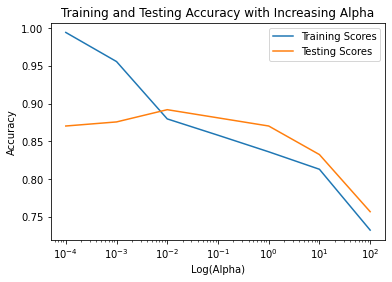

In [35]:
plt.plot(alpha_and_scores['Alpha'], alpha_and_scores['Training_accuracy'], label = 'Training Scores')
plt.plot(alpha_and_scores['Alpha'], alpha_and_scores['Testing_accuracy'], label = 'Testing Scores')
plt.semilogx()
plt.title("Training and Testing Accuracy with Increasing Alpha")
plt.ylabel('Accuracy')
plt.xlabel('Log(Alpha)')
plt.legend()
plt.show()

In [36]:
#type(Y_train_sentiment)
#np.unique(Y_train_sentiment)
for i in Y_train_sentiment:
    print(i)

0
0
-36
0
-69
-84
30
39
57
0
0
0
-83
-35
-86
94
-38
-60
36
73
66
46
0
23
32
-74
-90
-8
62
-61
70
72
57
46
0
-46
85
-67
0
-89
10
-74
54
85
56
80
61
42
37
-84
0
-83
32
40
5
84
-72
-18
24
60
51
-23
-13
88
73
15
38
91
-87
-13
79
-90
-85
-82
81
-77
-79
-44
95
85
49
-84
-27
81
-93
-69
66
-85
-42
-62
42
-34
-69
-64
64
75
19
-71
79
-18
-27
97
64
-72
-79
0
-94
97
30
75
-61
62
68
-15
75
-90
-77
-9
-70
54
0
-64
-83
-75
-46
-69
11
-25
-92
38
64
0
46
58
13
-25
56
54
20
-60
-91
54
0
38
0
60
-51
-85
53
-45
52
62
0
66
34
49
5
81
-85
97
87
91
0
0
0
0
73
-42
10
34
21
0
74
70
36
82
0
56
50
0
86
66
84
0
0
-70
-34
54
-13
-84
0
0
0
66
62
80
94
-84
-30
-97
19
-53
30
73
-51
56
-27
-25
-83
-44
-75
32
53
-63
-51
82
57
-63
93
-73
84
61
-45
55
-90
0
-85
71
54
54
66
0
62
0
-84
-27
-61
96
26
-85
73
75
51
84
54
10
-41
-66
64
25
57
74
79
15
95
-12
58
18
39
-52
45
-18
77
-20
60
-53
-56
-8
-87
64
-51
57
-61
-67
10
36
36
-72
93
0
-66
-15
-48
49
49
36
64
-70
-66
-86
80
89
57
-32
62
73
0
44
-20
11
53
78
78
80
48
74
53
39


In [37]:
#X_train_sentiment.unique()
#np.unique(X_train_sentiment)
X_train_sentiment.shape


(2593, 2)

In [43]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score

#Y_train_sentiment = Y_train_sentiment.astype('int')

classifier = SGDClassifier(loss='perceptron', max_iter=100000, tol=1.0e-12, random_state=123, eta0=100, average = True)
classifier.fit(X_train_sentiment, Y_train_sentiment)

print("Number of SGD iterations: %d" % classifier.n_iter_)
print("Training accuracy: %0.6f" % accuracy_score(Y_train_sentiment, classifier.predict(X_train_sentiment)))
print("Testing accuracy: %0.6f" % accuracy_score(Y_test_sentiment, classifier.predict(X_test_sentiment)))

args = np.argsort(classifier.coef_[0])

feature_name_weight = []
for a in args:
    feature_name_weight.append({'Feature_name': feature_names[a],'Individual_feature_weight': round(classifier.coef_[0][a],3)})
    #print(" %s: %0.4f" % (feature_names[a], classifier.coef_[0][a]))

Number of SGD iterations: 38011
Training accuracy: 0.089086
Testing accuracy: 0.097297


In [62]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score

#Y_train_sentiment = Y_train_sentiment.astype('int')

classifier = SGDClassifier(loss='log', max_iter=100000, tol=1.0e-12, random_state=123, eta0=100, alpha =.0000001, average = True)
classifier.fit(X_train_sentiment, Y_train_sentiment)

print("Number of SGD iterations: %d" % classifier.n_iter_)
print("Training accuracy: %0.6f" % accuracy_score(Y_train_sentiment, classifier.predict(X_train_sentiment)))
print("Testing accuracy: %0.6f" % accuracy_score(Y_test_sentiment, classifier.predict(X_test_sentiment)))

args = np.argsort(classifier.coef_[0])

feature_name_weight = []
for a in args:
    feature_name_weight.append({'Feature_name': feature_names[a],'Individual_feature_weight': round(classifier.coef_[0][a],3)})
    #print(" %s: %0.4f" % (feature_names[a], classifier.coef_[0][a]))

Number of SGD iterations: 340
Training accuracy: 0.089472
Testing accuracy: 0.097297


In [40]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [56]:

alphalist = [0.0001,0.001,0.01,0.1,1.0,10.0,100.0]
alpha_and_scores_sentiment = []

#create a for loop that creates new classifier for each alpha value in alphalist 
#appends the accuracy scores into our new lists so we can plot
for i in tqdm(alphalist, desc="3000 hours later",ascii="|*|*|*|"):
    loopedlogclassifier = SGDClassifier(loss='log', max_iter=100123, tol=1.0e-12, random_state=123, eta0=100, alpha =i)
    loopedlogclassifier.fit(X_train_sentiment, Y_train_sentiment)
    alpha_and_scores_sentiment.append({'Training_accuracy':accuracy_score(Y_train_sentiment, loopedlogclassifier.predict(X_train_sentiment)),'Testing_accuracy':accuracy_score(Y_test_sentiment, loopedlogclassifier.predict(X_test_sentiment)),'Alpha':i})
    #testingscores.append(accuracy_score(Y_test, loopedlogclassifier.predict(X_test)))
    #print(f'Alpha = {i}')
    #print(f'Training Accuracy: {accuracy_score(Y_train, loopedlogclassifier.predict(X_train))}')
    #print(f'Testing Accuracy: {accuracy_score(Y_test, loopedlogclassifier.predict(X_test))}')

3000 hours later:  29%|||*|||||||| 2/7 [00:00<00:02,  2.33it/s]/Users/zevmcmillen/opt/anaconda3/envs/machine-learning/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
3000 hours later:  43%|||||*|||||| 3/7 [18:04<33:01, 495.25s/it]/Users/zevmcmillen/opt/anaconda3/envs/machine-learning/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
3000 hours later:  57%|||||||||||| 4/7 [1:09:42<1:16:08, 1522.69s/it]/Users/zevmcmillen/opt/anaconda3/envs/machine-learning/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum num

In [59]:
alpha_and_scores_sentiment = pd.DataFrame(alpha_and_scores_sentiment)
alpha_and_scores_sentiment

,Training_accuracy,Testing_accuracy,Alpha
0,0.150405,0.156757,0.0001
1,0.150405,0.156757,0.0010
2,0.150405,0.156757,0.0100
3,0.150405,0.156757,0.1000
4,0.150405,0.156757,1.0000
5,0.150405,0.156757,10.0000
6,0.006170,0.000000,100.0000


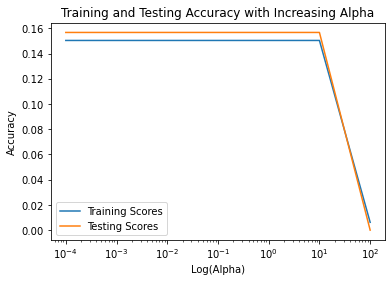

In [60]:
plt.plot(alpha_and_scores_sentiment['Alpha'], alpha_and_scores_sentiment['Training_accuracy'], label = 'Training Scores')
plt.plot(alpha_and_scores_sentiment['Alpha'], alpha_and_scores_sentiment['Testing_accuracy'], label = 'Testing Scores')
plt.semilogx()
plt.title("Training and Testing Accuracy with Increasing Alpha")
plt.ylabel('Accuracy')
plt.xlabel('Log(Alpha)')
plt.legend()
plt.show()

In [87]:
from sklearn.ensemble import RandomForestClassifier

# code for 2.3 here
n_estimators = ([10,50,100,300])
max_depth_best = ([14,100])
min_samples = [2,10,15,20,30,40,50]
estimator_accuracy_df = ([])
filtered_df = []

for n_ in n_estimators:
    for max_ in max_depth_best:
        for min_ in min_samples:
            clf2 = RandomForestClassifier(n_estimators= n_, max_depth=max_, min_samples_leaf=min_, random_state=123)
            clf2.fit(X_train_sentiment, Y_train_sentiment)
            #print(accuracy_score(Y_test_sentiment, clf2.predict(X_test_sentiment)))
            filtered_df.append({'n_estimators': n_, 'max_depth': max_, 'min_samples': min_,'Testing accuracy': accuracy_score(Y_test_sentiment, clf2.predict(X_test_sentiment))}) 
    


In [88]:
estimator_data = pd.DataFrame(filtered_df)
estimator_data

,n_estimators,max_depth,min_samples,Testing accuracy
0,10,14,2,0.156757
1,10,14,10,0.156757
2,10,14,15,0.156757
3,10,14,20,0.156757
4,10,14,30,0.156757
5,10,14,40,0.156757
6,10,14,50,0.156757
7,10,100,2,0.156757
8,10,100,10,0.156757
9,10,100,15,0.156757


## Results

_Using this cell, please write a short, clear paragraph explaining your results. In this class, we have mostly focused on accuracy. It is OK to measure your results in another quantitative way (e.g. precision or likelihood). Whatever you pick, make sure you are clear on what you are doing, and make sure you explain why your measurement of success makes sense._

<b>
The two results consist of both alpha scores on the original trainig/testing df and the alpha scores sentiment are the scores for the Vadersentiment analysis. The alpha scores training and testing accuracies are promising for differnet alpha measures for the SGD classifier. The maximum and minimum scores range from... Training_accuracy min 0.73 Training_accuracy max 0.99 Testing_accuracy min 0.76 Testing_accuracy max 0.89. I had also discovered that the testing and training sets intersect at an alpha of 0.0100. This indicates to me that the data is not being over fit becuase the alpha is low. Moreover, the intersection cross point indicates that a stable learning rate for the training set to the testing set is roughly 87-89%.
<br>
Unfortunetly for my sentiment analysis testing my scores were extremaly low. There are a few possible reasons for this however, the biggest glaring one is that the classifier was not able to properly classify the labels from my Y-training_sentiment data to my testing set. To find other possible reasons I am going to preform recall and precision scores to help nuetralize a sampling error. Moreover, I am going to use a confusion_matrix to identify the scores mislabeled or incorrect results from the testing to trainig set. 
</b>

In [199]:
t_min = round(alpha_and_scores['Training_accuracy'].min(),2)
t_max = round(alpha_and_scores['Training_accuracy'].max(),2)
test_min = round(alpha_and_scores['Testing_accuracy'].min(),2)
test_max = round(alpha_and_scores['Testing_accuracy'].max(),2)

In [200]:
print('Training_accuracy min',t_min,'Training_accuracy max',t_max,'Testing_accuracy min',test_min,'Testing_accuracy max',test_max)



Training_accuracy min 0.73 Training_accuracy max 0.99 Testing_accuracy min 0.76 Testing_accuracy max 0.89


In [161]:
alpha_and_scores

,Training_accuracy,Testing_accuracy,Alpha
0,0.994215,0.870270,0.0001
1,0.955650,0.875676,0.0010
2,0.879676,0.891892,0.0100
3,0.858079,0.881081,0.1000
4,0.836097,0.870270,1.0000
5,0.812958,0.832432,10.0000
6,0.732356,0.756757,100.0000


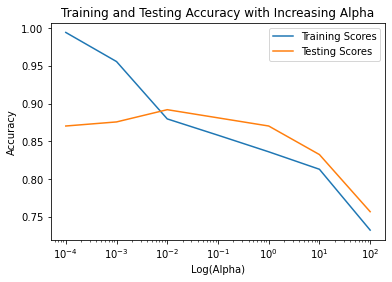

In [165]:
#x and y train analysis
plt.plot(alpha_and_scores['Alpha'], alpha_and_scores['Training_accuracy'], label = 'Training Scores')
plt.plot(alpha_and_scores['Alpha'], alpha_and_scores['Testing_accuracy'], label = 'Testing Scores')
plt.semilogx()
plt.title("Training and Testing Accuracy with Increasing Alpha")
plt.ylabel('Accuracy')
plt.xlabel('Log(Alpha)')
plt.legend()
plt.show()

In [203]:
t_min = round(alpha_and_scores_sentiment['Training_accuracy'].min(),3)
t_max = round(alpha_and_scores_sentiment['Training_accuracy'].max(),3)
test_min = round(alpha_and_scores_sentiment['Testing_accuracy'].min(),3)
test_max = round(alpha_and_scores_sentiment['Testing_accuracy'].max(),3)

In [204]:
print('Training_accuracy min',t_min,'Training_accuracy max',t_max,'Testing_accuracy min',test_min,'Testing_accuracy max',test_max)



Training_accuracy min 0.006 Training_accuracy max 0.15 Testing_accuracy min 0.0 Testing_accuracy max 0.157


In [162]:
alpha_and_scores_sentiment

,Training_accuracy,Testing_accuracy,Alpha
0,0.150405,0.156757,0.0001
1,0.150405,0.156757,0.0010
2,0.150405,0.156757,0.0100
3,0.150405,0.156757,0.1000
4,0.150405,0.156757,1.0000
5,0.150405,0.156757,10.0000
6,0.006170,0.000000,100.0000


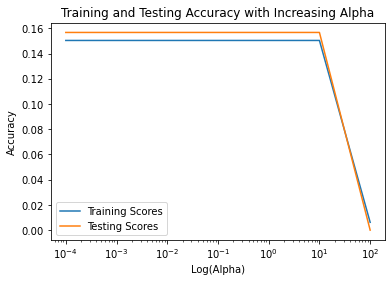

In [164]:
#sentiment score analysis
plt.plot(alpha_and_scores_sentiment['Alpha'], alpha_and_scores_sentiment['Training_accuracy'], label = 'Training Scores')
plt.plot(alpha_and_scores_sentiment['Alpha'], alpha_and_scores_sentiment['Testing_accuracy'], label = 'Testing Scores')
plt.semilogx()
plt.title("Training and Testing Accuracy with Increasing Alpha")
plt.ylabel('Accuracy')
plt.xlabel('Log(Alpha)')
plt.legend()
plt.show()

anaylsis

## Error analysis

_Using this cell, please write a short, clear paragraph explaining what errors your model seems to be making, and offer a brief explanation based on your code below._ 

You must:
1. Perform some error analysis technique, such as making a confusion matrix or examining model mistakes.


In this section I am preforming cross validation score predictions to identify how my Y-predicted variable is performing against my y-training data. I am starting my analysis with the sentiment data specifically becasue my accuracy scores were so low and exploring the errors in my data and learning model will help improve my accuracies. then I used my new y-precited data set to compare with my y-training set wihtin a confusion_matrix. This will identify the points that the predicted y scored wrongly (which were majority). From this stage I am going to run my predicted y against the training set for both precision and recall. This will give me the classifiers precision at finiding the similarities between both sets and the recall will score the probability that relevent points in the data are being retrieved. Overall, this will help me identify how many overall points the learning algorithm is missing and the perecntage of its accuracy guessing a point. Furthermore, the recall also help identify if the data is being over fit, which it is not because both precision and recall were so low. 

Moreover, in my other non-senitment training set I ran the same error fucntions. I found the precision and recall scores for different type ways of averaging the data within the precision and recall model. This helped me identify the most accurate way to average my data within the score fucntion for optimal results. The chart of this goes as follows. 	


| `Average type`   | `Precision score` | `Recall score` |
|:----------|:-:|:------------:|
| `macro`    | $0.001102$     |     $0.004915$    |
| `micro`   | $0.033552$     |       $0.033552$       |
| `weighted`    | $0.029127$     |        $0.033552$      |


In [149]:
classifier = SGDClassifier(loss='log', max_iter=1000, tol=1.0e-12, random_state=123, eta0=100, alpha =0.0001)
#classifier.fit(X_train, Y_train)

In [103]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(classifier, X_train_sentiment, Y_train_sentiment, cv=3)
 
"""
You could make predictions on the test set, but use the test set only at the very end of your project, once you have a classifier that you are ready to launch.
"""
 
# Constructing the confusion matrix.
#from sklearn.metrics import confusion_matrix
#confusion_matrix(X_train_sentiment, Y_train_sentiment)
from sklearn.metrics import confusion_matrix
confuse = confusion_matrix(Y_train_sentiment, y_train_pred)


/Users/zevmcmillen/opt/anaconda3/envs/machine-learning/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


In [113]:
for i in y_train_pred:
    print(i)

-37
-37
-37
-37
-37
-37
0
0
-37
-37
-37
0
-37
-37
-37
-37
0
0
0
0
0
-37
-37
-37
-37
-37
-37
0
0
-37
0
0
0
0
0
-37
0
-37
-37
-37
-37
-37
-37
0
-37
0
-37
-37
-37
-37
0
-37
-37
-37
0
-37
-37
-37
-37
0
0
0
0
0
-37
0
0
0
-37
-37
0
0
-37
-37
0
-37
-37
-37
-37
-37
-37
-37
-37
-37
-37
-37
-37
-37
-37
-37
-37
-37
-37
-37
-37
-37
-37
-37
0
-37
-37
-37
-37
-37
-37
-37
-37
-37
0
-37
-37
-37
0
0
-37
-37
-37
-37
-37
0
0
-37
-37
-37
-37
-37
-37
-37
-37
0
0
0
0
0
-37
-37
0
0
0
-37
-37
-37
-37
0
0
-37
-37
-37
-37
-37
-37
0
0
0
-37
-37
-9
-37
-37
19
-37
0
0
0
0
0
0
0
0
0
-33
-37
0
0
0
-37
0
-37
-37
-37
0
0
-37
-37
-37
-37
-37
-37
-37
-37
-37
-37
-37
-37
-37
-37
-37
19
-37
-37
19
-37
-37
-37
-37
19
-37
-37
19
-37
-37
-37
-37
-37
-37
-37
0
-37
-37
-37
-37
-37
-37
-37
19
0
19
0
0
0
0
0
-37
-37
19
-37
-37
-37
-37
19
-37
-37
-37
-37
-37
-37
19
-37
-37
-37
0
0
-37
-37
-37
19
-37
-37
19
-37
-37
-37
-37
-37
-37
-37
-37
19
-37
-37
-37
-37
19
-37
-37
-37
0
-37
0
0
-37
-37
-37
-37
-37
-37
-37
19
-37
-37
-37
0
0
-3

In [114]:
for i in Y_train_sentiment:
    print(i)

0
0
-36
0
-69
-84
30
39
57
0
0
0
-83
-35
-86
94
-38
-60
36
73
66
46
0
23
32
-74
-90
-8
62
-61
70
72
57
46
0
-46
85
-67
0
-89
10
-74
54
85
56
80
61
42
37
-84
0
-83
32
40
5
84
-72
-18
24
60
51
-23
-13
88
73
15
38
91
-87
-13
79
-90
-85
-82
81
-77
-79
-44
95
85
49
-84
-27
81
-93
-69
66
-85
-42
-62
42
-34
-69
-64
64
75
19
-71
79
-18
-27
97
64
-72
-79
0
-94
97
30
75
-61
62
68
-15
75
-90
-77
-9
-70
54
0
-64
-83
-75
-46
-69
11
-25
-92
38
64
0
46
58
13
-25
56
54
20
-60
-91
54
0
38
0
60
-51
-85
53
-45
52
62
0
66
34
49
5
81
-85
97
87
91
0
0
0
0
73
-42
10
34
21
0
74
70
36
82
0
56
50
0
86
66
84
0
0
-70
-34
54
-13
-84
0
0
0
66
62
80
94
-84
-30
-97
19
-53
30
73
-51
56
-27
-25
-83
-44
-75
32
53
-63
-51
82
57
-63
93
-73
84
61
-45
55
-90
0
-85
71
54
54
66
0
62
0
-84
-27
-61
96
26
-85
73
75
51
84
54
10
-41
-66
64
25
57
74
79
15
95
-12
58
18
39
-52
45
-18
77
-20
60
-53
-56
-8
-87
64
-51
57
-61
-67
10
36
36
-72
93
0
-66
-15
-48
49
49
36
64
-70
-66
-86
80
89
57
-32
62
73
0
44
-20
11
53
78
78
80
48
74
53
39


In [106]:
for i in confuse:
    print(i)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [136]:
from sklearn.metrics import precision_score, recall_score
list_of_averge = ['macro', 'micro', 'weighted']
precision_recall_sentiment = []

for av in list_of_averge:
    prec = precision_score(Y_train_sentiment, y_train_pred, average=av)
    recall = recall_score(Y_train_sentiment, y_train_pred, average=av)
    precision_recall_sentiment.append({'Average type': av, 'Precision score': prec,'Recall score':recall})



/Users/zevmcmillen/opt/anaconda3/envs/machine-learning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zevmcmillen/opt/anaconda3/envs/machine-learning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [137]:
precision_recall_sentiment = pd.DataFrame(precision_recall_sentiment)
precision_recall_sentiment

,Average type,Precision score,Recall score
0,macro,0.001102,0.004915
1,micro,0.033552,0.033552
2,weighted,0.029127,0.033552


In [150]:
import numpy as np

y_test_sentiment = np.asarray(Y_test_sentiment)
misclassified = np.where(y_test_sentiment != clf.predict(X_test_sentiment))


In [153]:
misclassified

(array([  3,   4,   5,   6,   8,   9,  10,  13,  14,  16,  17,  18,  19,
         20,  21,  22,  23,  24,  25,  26,  27,  28,  30,  31,  32,  33,
         34,  36,  37,  38,  39,  40,  42,  43,  45,  47,  48,  49,  50,
         52,  54,  55,  56,  57,  58,  59,  62,  63,  64,  65,  66,  67,
         68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  80,  82,
         83,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
         97,  98,  99, 100, 101, 102, 103, 105, 106, 107, 108, 110, 111,
        113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 152, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 178, 179, 180, 181, 182, 184]),)

In [142]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(classifier, X_train,Y_train, cv=3)
 
"""
You could make predictions on the test set, but use the test set only at the very end of your project, once you have a classifier that you are ready to launch.
"""
 
# Constructing the confusion matrix.
#from sklearn.metrics import confusion_matrix
#confusion_matrix(X_train_sentiment, Y_train_sentiment)
from sklearn.metrics import confusion_matrix
confuse = confusion_matrix(Y_train, y_train_pred)


In [143]:
y_train_pred

array(['Android', 'Android', 'Android', ..., 'iPhone', 'Android',
       'Android'], dtype='<U7')

In [144]:
confuse

array([[1099,  240],
       [ 224, 1030]])

In [146]:
from sklearn.metrics import precision_score, recall_score
list_of_averge = ['macro', 'micro', 'weighted']
precision_recall_ = []

for av in list_of_averge:
    prec = precision_score(Y_train, y_train_pred, average=av)
    recall = recall_score(Y_train, y_train_pred, average=av)
    precision_recall_.append({'Average type': av, 'Precision score': prec,'Recall score':recall})



In [148]:
precision_recall_ = pd.DataFrame(precision_recall_)
precision_recall_

,Average type,Precision score,Recall score
0,macro,0.820856,0.821067
1,micro,0.821057,0.821057
2,weighted,0.821178,0.821057


In [ ]:
## Error analysis

# Include code for error analysis here, to justify your conclusions. 
# You might make a confusion matrix, sample misclassifier data, analyze learned weights, or use any other method 
# discussed in class, or which makes sense for your model

## Summary and conclusion

_Using this cell, please write a short, clear paragraph describing how your results answer or do not answer your question. What are the implications of your findings? What new questions arise from your work?_

<b>Overall my analysis partly answers my question of 'can we predict who is tweeting President Trump's tweets from sentiment and word analysis'. The analysis is strong for for the labels. The classifier was able to predict which tweet was Trump's or his staff's by the Iphone or Android label. Morevoer, the precision at which it was identifying the two distinctive tweets was also positive as it is nearly linearly seperable by .99. However, the sentiment data had weak labels. Using the same boolean 0 or 1 output for the labels (Android/Iphone) as before, however, the sentiment scores were not correlated enough to the label. This casued the learning algoriuth to make wrong predictions and also casued my accuracy and precision scores to be extreamly low. The maximum accuracy I achieved was roughly 15%. Overall, this means that the data is not fit to identify who is tweeting or not by their analysis. If I were to edit or change by approach I would have chosen a bag of words approach and replace sentiments with boolean POS or NEG. </b>